<a href="https://colab.research.google.com/github/simprac/hello-world/blob/master/%EB%AF%B8%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

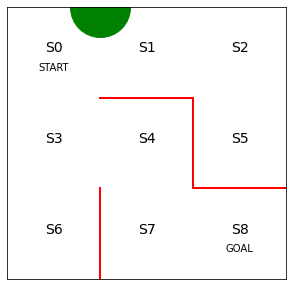

In [35]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
plt.plot([0.5,0.5], [-0.5,0.5], color='red', linewidth=2)
plt.plot([0.5,1.5], [1.5,1.5], color='red', linewidth=2)
plt.plot([1.5,1.5], [1.5,0.5], color='red', linewidth=2)
plt.plot([1.5,2.5], [0.5,0.5], color='red', linewidth=2)

n = 0
for y in range(3):
    for x in range(3):
        plt.text(x, 2 - y, f"S{n}", size=14, ha='center')
        n += 1
plt.text(0, 1.8, 'START', ha='center')
plt.text(2, -0.2, 'GOAL', ha='center')

ax.set_xlim(-0.5,2.5)
ax.set_ylim(-0.5,2.5)

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

n = 0.0

theta_0 = np.array([
    [n, 1, 1, n],
    [n, 1, n, 1],
    [n, n, 1, 1],
    [1, 1, 1, n],
    [n, n, 1, 1],
    [1, n, n, n],
    [1, n, n, n],
    [1, 1, n, n],
])

In [ ]:
def simple_convert_theta_to_pi(theta):
    pi = np.zeros_like(theta)
    for i in range(pi.shape[0]):
        pi[i] = theta[i] / np.sum(theta[i])
    return pi

def get_next_state(pi, s):
    offset = [-3, +1, +3, -1]
    return s + np.random.choice(offset, p=pi[s])

def run_maze(pi):
    history = [0]
    while (history[-1] != 8):
        history.append(get_next_state(pi, history[-1]))
    return history

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = state % 3
    y = 2 - state // 3
    line.set_data(x, y)
    return (line,)

pi_0 = simple_convert_theta_to_pi(theta_0)
state_history = run_maze(pi_0)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())